In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('plan.xlsx')
df

,Task,Department,Start,End,start_num,end_num,days_start_to_end
0,Product Design,Product Plan,2021-11-04,2021-11-09,1,6,5
1,Mechanism Design,HW,2021-11-11,2021-11-20,8,17,7
2,3D CAD,HW,2021-11-18,2021-11-26,15,22,7
3,3D Simulation,HW,2021-11-26,2021-12-03,22,29,7
4,Motor Driving,SW,2021-11-11,2021-11-18,8,15,7
5,Gyro Sensing,SW,2021-11-18,2021-11-26,15,22,7
6,Potential Client Survey,Marketing,2021-11-17,2021-11-21,14,18,14
7,Market Research,Marketing,2021-11-10,2021-11-17,7,14,7
8,PR Planning,Marketing,2021-12-01,2021-12-07,27,33,11


In [4]:
# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

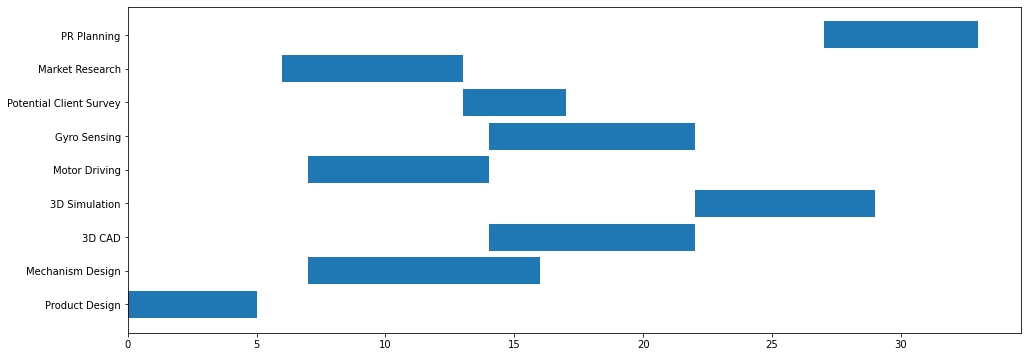

In [5]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num)
plt.show()

In [6]:
# create a column with the color for each department
def color(row):
    c_dict = {'Product Plan':'#E64646', 'HW':'#E69646', 'SW':'#34D05C', 'Marketing':'#34D0C3'}
    return c_dict[row['Department']]
df['color'] = df.apply(color, axis=1)

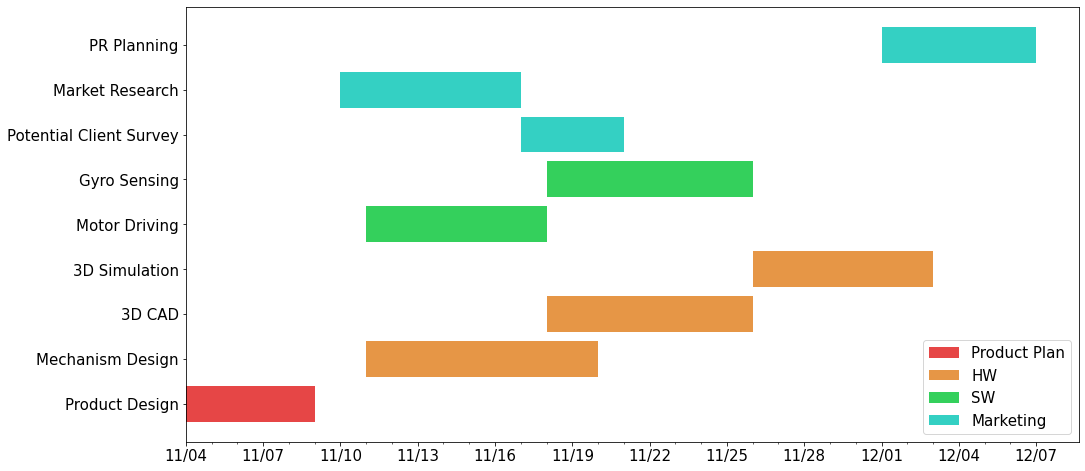

In [7]:
from matplotlib.patches import Patch
plt.rc('font', size=15)  
fig, ax = plt.subplots(1, figsize=(16,8))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)
##### LEGENDS #####
c_dict = {'Product Plan':'#E64646', 'HW':'#E69646', 'SW':'#34D05C', 'Marketing':'#34D0C3'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
#plt.show()
plt.savefig("TimeLine.png", bbox_inches='tight')